# Tutorial 8: Non-linear equations and Optimization

## Exercise 1: Newton vs Bisection

Let's try to solve the following non-linear equation which has no algebraic solution:
$$e^{x}+\sin(x)+x = 0$$

We can try two different approaches for solving this equation:
* Bisection method
* Newton's method 

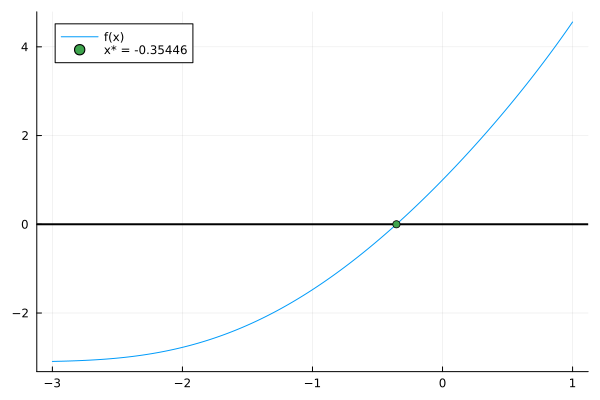

In [1]:
import Plots

x = -3:0.01:1;
f(x) = @. exp(x) + sin(x) + x;

Plots.plot(x,f(x),label="f(x)")
Plots.hline!([0],color=:black,label="",linewidth=2)
Plots.scatter!([-0.35446],[0],label="x* = -0.35446")

### Bisection method
The bisection method is a method that iteratively halves the range under analysis until it finds a good estimate of the root of the function.  

This algorithm usually requires that the function under consideration has only one root in the range under consideration, that the root has a odd multiplicity, and that the function is continuous in the range.

It relies on the function having opposite signs on the extremes of the range.

**Target**: Find $x^{*}\in[a,b]$, such that $f(x^{*}) = 0$.  
**Assumption**: $f(a)f(b) < 0$  
**Algorithm**:  

0. Define the initial range limits: $a_{0} = a, b_{0} = b$
1. Find the range middle point
$$m_{i}=\frac{a_{i}+b_{i}}{2}$$
2. Evaluate the function in the middle point: $f(m_{i})$
3. Define the new range according depending on the value of $f(m_{i})$:  
    a. If $f(a_{i})f(m_{i}) < 0$, then:
$$a_{i+1} = a_{i}$$
$$b_{i+1} = m_{i}$$
    b. If $f(m_{i})f(b_{i}) < 0$, then:
$$a_{i+1} = m_{i}$$
$$b_{i+1} = b_{i}$$
    c. If $f(m_{i}) = 0$, then $x^{*}=m_{i}$ and the algorithm stops.
4. Go back to Step 1, unless the maximum number of iterations have been exceeded or a minimum tolerance on the range width has been reached.

In [2]:
function bisection(f,a,b,max_iter,toll)
    iter = 0;
    m = b;
    while iter <= max_iter && abs(b-a) > toll
        m = (b+a)/2;
        if f(a)*f(m) < 0
            b = m;
        elseif f(m)*f(b) < 0
            a = m;
        elseif f(m) == 0
            break
        end
        iter += 1;
    end
    return (m, iter);
end

(x_bis,iter_bis) = bisection(f,-3,1,100,1e-6);

println("The approximated solution using bisection method is $(x_bis).")
println("The bisection method required $(iter_bis) iterations.")

The approximated solution using bisection method is -0.3544626235961914.
The bisection method required 22 iterations.


### Newton's method
The Newton's method is implemented using the following equation:
$$x_{i+1} = x_{i}-\frac{f(x_{i})}{f'(x_{i})}$$

The stop criterion is usually when a maximum number f iteration is surpassed or when the difference between two consecutive values of $x$ is below a tolerance.

In this case, the derivative of $f$ is:
$$f'(x) = e^{x}+\cos(x)+1$$

In [3]:
function newton(f,df,x0,max_iter,toll)
    iter = 1;
    x_old = x0;
    x_new = x_old-f(x_old)/df(x_old);
    while iter <= max_iter && abs(x_new-x_old) >= toll
        x_old = x_new;
        x_new = x_old-f(x_old)/df(x_old);
        iter += 1;
    end
    return (x_new, iter);
end

df(x) = @. exp(x) + cos(x) + 1;
(x_nwt,iter_nwt) = newton(f,df,1,100,1e-6);

println("The approximated solution using Newton's method is $(x_nwt).")
println("The Newton's method required $(iter_nwt) iterations.")

The approximated solution using Newton's method is -0.3544631043750253.
The Newton's method required 5 iterations.


## Exercise 2: Convergence of Newton's method
One significant limitation of Newton's method is that the choice of $x_{0}$ is extremely important as it can decide if the algorithm will converge to a root or not.

Let's consider the following non-linear equation:
$$\frac{2x^{2}-8x}{x^{2}+1} = 2$$

This equation has an approximate solution: $x^{*} \approx -\frac{1}{4}$.

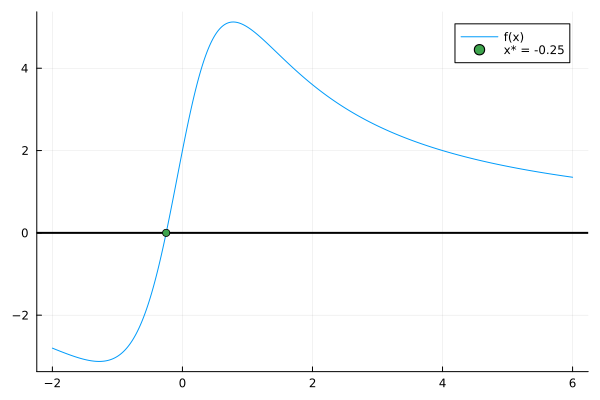

In [4]:
x = -2:0.01:6;
x_star = −0.25;
f(x) = @. - (2x^2 - 8x) / (x^2 + 1) + 2;
df(x) = @. (-8x^2 - 4x + 8) / (x^4 + 2x^2 + 1);

Plots.plot(x,f(x),label="f(x)")
Plots.hline!([0],color=:black,label="",linewidth=2)
Plots.scatter!([x_star],[0],label="x* = $(x_star)")

### First try: $x_{0} = 0$

Let's try to find the root of the equation using the Newton's method starting from $x_{0}=0$.

In [5]:
(x_1,iter_1) = newton(f,df,0,100,1e-6);

println("The approximated solution starting from 0 is $(x_1).")
println("The Newton's method required $(iter_1) iterations.")
println("The relative error of the solution is $(abs((x_1-x_star)/x_star)).")

The approximated solution starting from 0 is -0.25.
The Newton's method required 2 iterations.
The relative error of the solution is 0.0.


Newton's method was able to converge to a very accurate approximation of the solution in just 2 iterations.

### Second try: $x_{0} = 3$

Let's try to find the root of the equation using the Newton's method starting from $x_{0}=3$.

In [6]:
(x_2,iter_2) = newton(f,df,3,100,1e-6);

println("The approximated solution starting from 3 is $(x_2).")
println("The Newton's method required $(iter_2) iterations.")
println("The relative error of the solution is $(abs((x_2-x_star)/x_star)).")

The approximated solution starting from 3 is 5.410330530308407e16.
The Newton's method required 55 iterations.
The relative error of the solution is 2.164132212123363e17.


Newthon method's is following the right horizontal asymptote and it is going towards $x \rightarrow+\infty$.
It stops after 55 iterations because of rounding errors: the function $f(x)$ is approximated to 0 for extremely high values of $x$.

### Third try: $x_{0} = -3$

Let's try to find the root of the equation using the Newton's method starting from $x_{0}=-3$.

In [7]:
(x_3,iter_3) = newton(f,df,-3,100,1e-6);

println("The approximated solution starting from -3 is $(x_3).")
println("The Newton's method required $(iter_3) iterations.")
println("The relative error of the solution is $(abs((x_3-x_star)/x_star)).")

The approximated solution starting from -3 is -8.539856994663994e16.
The Newton's method required 55 iterations.
The relative error of the solution is 3.4159427978655974e17.


Newthon method's is following the right horizontal asymptote and it is going towards $x \rightarrow-\infty$.
It stops after 55 iterations because of rounding errors: the function $f(x)$ is approximated to 0 for extremely low values of $x$.

### Basin of convergence of the Newton's method
We can now apply multiple times the Newton's method and see how changing the value of $x_{0}$ changes the convergence of the solution.

In [8]:
x = -5:0.01:5;

x_sol1 = [];
x_inf = [];
x_neginf = [];

for i = 1:length(x)
    (x_temp,iter_temp) = newton(f,df,x[i],100,1e-6);
    if x_temp > 1e15
        push!(x_inf,x[i])
    elseif x_temp < -1e15
        push!(x_neginf,x[i])
    elseif abs(x_temp+0.25) < 0.1
        push!(x_sol1,x[i])
    end
end

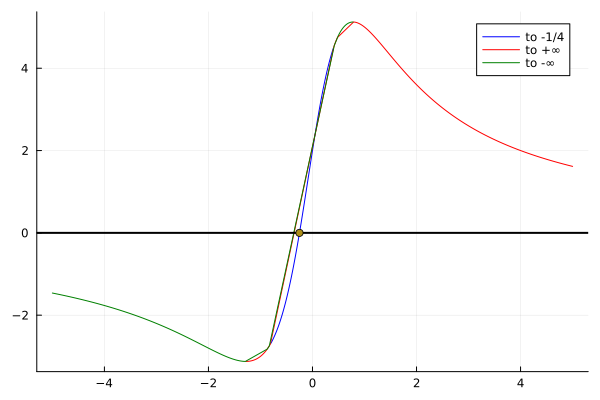

In [9]:
Plots.plot(x_sol1,f(x_sol1),color=:blue,label="to -1/4")
Plots.plot!(x_inf,f(x_inf),color=:red,label="to +∞")
Plots.plot!(x_neginf,f(x_neginf),color=:green,label="to -∞")
Plots.hline!([0],color=:black,label="",linewidth=2)
Plots.scatter!([x_star],[0],label="")

## Exercise 3: Order of convergence of Newton's algorithm
Let's test the theoretical order of convergence of Nweton's algorithm, by considering the absolute error for each iteration of the algorithm on the following equation:
$$\frac{1}{2}x^{4}+x^{3}-\frac{5}{4}x^{2}+\frac{1}{2}x-\frac{3}{4} = 0$$

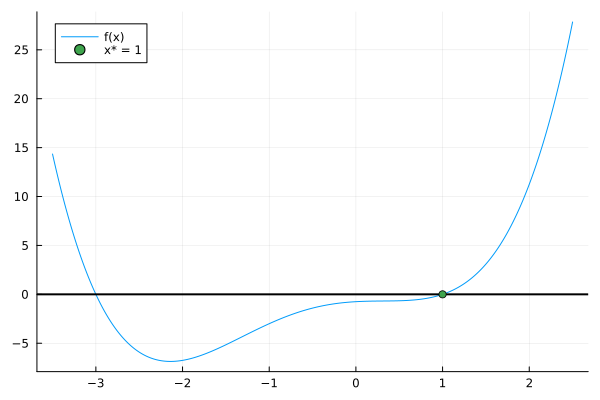

In [10]:
x = -3.5:0.01:2.5;
x_star = 1;
f(x) = @. 1/2 * x^4 + x^3 - 5/4 * x^2 + 1/2 * x - 3/4;
df(x) = @. 2x^3 + 3x - 5/2 * x + 1/2;

Plots.plot(x,f(x),label="f(x)")
Plots.hline!([0],color=:black,label="",linewidth=2)
Plots.scatter!([x_star],[0],label="x* = $(x_star)")

The theorem you saw in lecture says that if:
* *Hp 1*: $f$, $f'$ and $f''$ are continuous in the neighbourhood of a root $x^{*}$ of $f(x)$.
* *Hp 2*: $f'(x^{*})\neq 0$

then there exists a $\delta > 0$ such that if $|x^{*}-x_{0}| \leq \delta$, then all the $x_{i}$ solutions generated by Newton's method will satisfy the following relation:
$$|x_{i+1}-x^{*}|\leq c |x_{i}-x^{*}|^{2}$$
$$\text{where }c = \frac{1}{2}\frac{\max_{|x-x^{*}|\leq\delta}|f''(x)|}{\min_{|x-x^{*}|\leq\delta}|f'(x)|}$$

The function under analysis is:
$$f(x)=\frac{1}{2}x^{4}+x^{3}-\frac{5}{4}x^{2}+\frac{1}{2}x-\frac{3}{4}$$
$$f'(x)=2x^{3}+3x^{2}-\frac{5}{2}x+\frac{1}{2}$$
$$f''(x)=6x^{2}+6x-\frac{5}{2}$$
The function, its derivative and its double derivative are continuous for all real numbers (Hypothesys 1 satisfied).  
The function does not have a stationary point in either of its roots: $f'(1)=3$ and $f'(-3)=-19$ (Hypothesys 2 satisfied).

Therefore, we can apply the theorem above starting from $x_{0}=2$.

In [11]:
function newtonConv(f,df,x0,max_iter,toll)
    iter = 1;
    x_old = x0;
    x_new = x_old-f(x_old)/df(x_old);
    x_hist = [x0; x_new];
    while iter <= max_iter && abs(x_new-x_old) >= toll
        x_old = x_new;
        x_new = x_old-f(x_old)/df(x_old);
        iter += 1;
        push!(x_hist,x_new);
    end
    return x_hist;
end

x_history = newtonConv(f,df,2,100,1e-6)

println("The Newton's method converges to $(x_history[end]) in $(length(x_history)) iterations.")

The Newton's method converges to 1.0 in 7 iterations.


Let's compute the value of the parameter $c$ for the theoretical limit.  
We choose $\delta=1$, since $|x^{*}-x_{0}|=|1-2|=1$.

We need now to find the maximum of the first and second derivative of the function in the range $[x^{*}-\delta,x^{*}+\delta]=[0,2]$.
$$m_{1}=\min_{[0,2]}|f'(x)|=\min_{[0,2]}\left|2x^{3}+3x^{2}-\frac{5}{2}x+\frac{1}{2}\right| = 0.0727$$
$$M_{2}=\max_{[0,2]}|f''(x)|=\max_{[0,2]}\left|6x^{2}+6x-\frac{5}{2}\right| = 33.5$$
$$c = \frac{1}{2}\frac{M_{2}}{m_{1}}=230$$

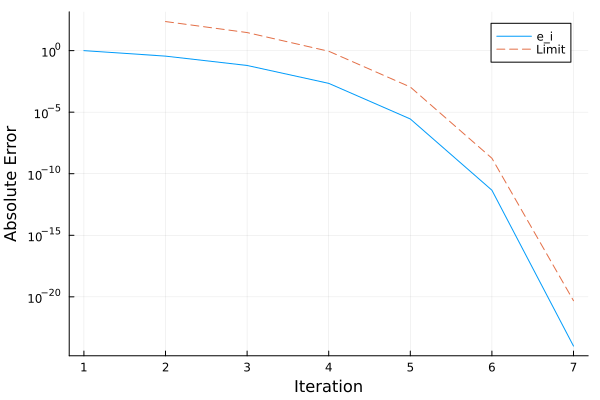

In [12]:
# Compute absolute error
n = 1:length(x_history);
err = abs.(x_history .- x_star);

# Compute error limit
c = 1/2*33.5/0.0727;
err_lim = c*(err[1:end-1]) .^ 2;

# Remove zero error for log plot
if err[end] == 0.0
    err[end] = 1e-24;
end

Plots.plot(n,err,yscale=:log10,xlabel="Iteration",ylabel="Absolute Error",label="e_i")
Plots.plot!(n[2:end],err_lim,linestyle=:dash,label="Limit")